# **Progetto di Digital Signal & Image Management**

## **Parte 2 - Image Classification - DEMO**

*2020/2021*

Peracchi Marco 800578

Uccheddu Christian 800428

In [5]:
import os
import numpy as np
from time import time
from scipy.io import wavfile as wav
import IPython.display as ipd

from PIL import Image

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import scale

import cv2 as cv

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import xception

from sklearn.linear_model import LogisticRegression

In [2]:
model_1 = tf.keras.models.load_model('modello_immagini-2')

In [18]:
cap = cv.VideoCapture("test_3.avi")
start_time = time()
while (time() - start_time) < 2:
    _, frame = cap.read()
    
    #Convert the captured frame into RGB
    im = Image.fromarray(frame, 'RGB')
    #Resizing into 128x128 because we trained the model with this image size.
    im = im.resize((224,224))
    img_array = np.array(im)
    

    #Our keras model used a 4D tensor, (images x height x width x channel)
    #So changing dimension 128x128x3 into 1x128x128x3 
    
    img_array = np.expand_dims(img_array, axis=0)

    #Calling the predict method on model to predict 'me' on the image
    prediction = model_1.predict(img_array)
    
    result = np.argmax(prediction, axis = 1)
    
    if result == 0:
        label = "No"
    else:
        label = "Yes"
    

    #if prediction is 0, which means I am missing on the image, then show the frame in gray color.
    
    text = "Emergency: {}{}".format(label, prediction)
    cv.putText(frame, text, (35, 50), cv.FONT_HERSHEY_SIMPLEX,
        1.25, (0, 255, 0), 5)

    cv.imshow("Capturing", frame)
    key=cv.waitKey(1)
    if key == ord('q'):
        break
        
cap.release()
cv.destroyAllWindows()

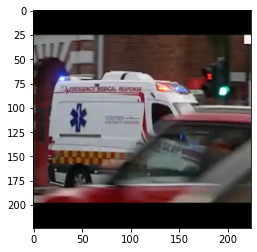

In [25]:
cap = cv.VideoCapture("test_3.avi")
start_time = time()
while (time() - start_time) < 40:
    _, frame = cap.read()
    
    im = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    #Convert the captured frame into RGB
    im = Image.fromarray(im, 'RGB')
    #Resizing into 128x128 because we trained the model with this image size.
    im = im.resize((224,224))
    img_array = np.array(im)
    #plt.imshow(img_array)
    

    #Our keras model used a 4D tensor, (images x height x width x channel)
    #So changing dimension 128x128x3 into 1x128x128x3 
    
    img_array = np.expand_dims(img_array, axis=0)
    plt.imshow(img_array[0,:,:,:])

    #Calling the predict method on model to predict 'me' on the image
    #prediction = int(model_1.predict(img_array)[0][0])
    prediction = model_1.predict(img_array)
    
    result = np.argmax(prediction, axis = 1)
    
    if result == 0:
        label = "No"
    else:
        label = "Yes"
    

    #if prediction is 0, which means I am missing on the image, then show the frame in gray color.
    
    text = "Emergency: {}{}".format(label, prediction)
    cv.putText(frame, text, (35, 50), cv.FONT_HERSHEY_SIMPLEX,
        1.25, (0, 255, 0), 5)

    cv.imshow("Capturing", frame)
    key=cv.waitKey(1)
    if key == ord('q'):
        break
        
cap.release()
cv.destroyAllWindows()

In [6]:
single_processing = keras.preprocessing.image.ImageDataGenerator(preprocessing_function= xception.preprocess_input)

single_generator = single_processing.flow_from_directory("single",
                                    target_size = (224, 224),
                                    color_mode = "rgb",
                                    batch_size = 13,
                                    class_mode = "categorical",
                                    shuffle = False,
                                    seed = 1)

test,label_test = next(single_generator)

Found 1 images belonging to 1 classes.


In [7]:
prova_pred = model_1.predict(single_generator)
result = np.argmax(prova_pred, axis = 1)
result

array([0], dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Predizione: 0')

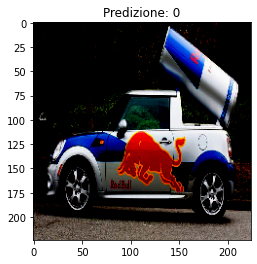

In [9]:
plt.imshow(test[0,:,:,:])
plt.title("Predizione: {}".format(result[0]))

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in pred_finali]

predictions